In [1]:
#Імпортуємо основні бібліотеки для роботи з даними
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Завантажуємо набір даних
my_data = pd.read_csv("C:/Users/Lenovo/Downloads/Sleep_health_and_lifestyle_dataset.csv")

In [3]:
#Переглядаємо перші 5 рядків для оцінки структури датасету
my_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Unnamed: 12
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,NaN
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,NaN


In [4]:
#Перевіряємо структуру і типи колонок
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
 12  Unnamed: 12              1 non-null      object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
#Видаляємо порожню колонку, що з'явилася після експорту даних
my_data = my_data.drop(columns=["Unnamed: 12"])

In [6]:
#Заповнюємо пропуски в категорії Sleep Disorder значенням None
my_data["Sleep Disorder"] = my_data["Sleep Disorder"].fillna("None")

In [7]:
#Базова описова статистика по числових колонках
my_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
my_data['Occupation'].unique() #Унікальні категорії професій

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [9]:
mean_by_occupation = my_data.groupby('Occupation').agg({
    'Quality of Sleep': 'mean', 
    'Stress Level': 'mean',
    'Physical Activity Level': 'mean',
    'Daily Steps' : 'mean',
    'Sleep Duration' : 'mean',
    'Person ID' : 'count'}).rename(columns={'Person ID' : 'count'})
mean_by_occupation.sort_values('Quality of Sleep', ascending = False)

,Quality of Sleep,Stress Level,Physical Activity Level,Daily Steps,Sleep Duration,count
Occupation,,,,,,
Engineer,8.412698,3.888889,51.857143,5980.952381,7.987302,63
Lawyer,7.893617,5.063830,70.425532,7661.702128,7.410638,47
Accountant,7.891892,4.594595,58.108108,6881.081081,7.113514,37
Nurse,7.369863,5.547945,78.589041,8057.534247,7.063014,73
Manager,7.000000,5.000000,55.000000,5500.000000,6.900000,1
Teacher,6.975000,4.525000,45.625000,5957.500000,6.690000,40
Doctor,6.647887,6.732394,55.352113,6808.450704,6.970423,71
Software Engineer,6.500000,6.000000,48.000000,5800.000000,6.750000,4
Salesperson,6.000000,7.000000,45.000000,6000.000000,6.403125,32


In [10]:
my_data.groupby('Occupation')['Sleep Disorder'].value_counts() # Порушення сну, які частіше трапляються в різних професіях

Occupation            Sleep Disorder
Accountant            None              30
                      Insomnia           7
Doctor                None              64
                      Sleep Apnea        4
                      Insomnia           3
Engineer              None              57
                      Insomnia           5
                      Sleep Apnea        1
Lawyer                None              42
                      Sleep Apnea        3
                      Insomnia           2
Manager               None               1
Nurse                 Sleep Apnea       61
                      None               9
                      Insomnia           3
Sales Representative  Sleep Apnea        2
Salesperson           Insomnia          29
                      None               2
                      Sleep Apnea        1
Scientist             None               2
                      Sleep Apnea        2
Software Engineer     None               3
                 

In [11]:
#Створюємо маску для групи "Nurse"(попередня фільтрація для подальшого аналізу)
Nurse_mask = my_data[my_data['Occupation'] == 'Nurse']

In [12]:
#Створюємо маску для групи "Scientist"(попередня фільтрація для подальшого аналізу)
Scientist_mask = my_data[my_data['Occupation'] == 'Scientist']

In [13]:
#Створюємо маску для групи "Teacher"(попередня фільтрація для подальшого аналізу)
Teacher_mask = my_data[my_data['Occupation'] == 'Teacher']

In [14]:
#Створюємо маску для групи "Doctor"(попередня фільтрація для подальшого аналізу)
Doctor_mask = my_data[my_data['Occupation'] == 'Doctor']

In [15]:
#Створюємо маску для групи "Software Engineer"(попередня фільтрація для подальшого аналізу)
Software_Engineer_mask = my_data[my_data['Occupation'] == 'Software Engineer']

In [16]:
#Кореляціія Quality of Sleep і Stress Level для вчителів.
Teacher_mask[['Quality of Sleep', 'Stress Level']].corr()

,Quality of Sleep,Stress Level
Quality of Sleep,1.000000,-0.749404
Stress Level,-0.749404,1.000000


In [17]:
#Кореляціія Physical Activity Level і Stress Level для вчителів.
Teacher_mask[['Physical Activity Level', 'Stress Level']].corr()

,Physical Activity Level,Stress Level
Physical Activity Level,1.000000,-0.525448
Stress Level,-0.525448,1.000000


In [18]:
#Кореляціія Sleep Duration і Stress Level для вчителів.
Teacher_mask[['Sleep Duration', 'Stress Level']].corr()

,Sleep Duration,Stress Level
Sleep Duration,1.000000,-0.062975
Stress Level,-0.062975,1.000000


In [19]:
#Кореляціія Quality of Sleep і Stress Level для медсестер.
Nurse_mask[['Quality of Sleep', 'Stress Level']].corr()

,Quality of Sleep,Stress Level
Quality of Sleep,1.000000,-0.965476
Stress Level,-0.965476,1.000000


In [20]:
#Кореляціія Physical Activity Level і Stress Level для медсестер.
Nurse_mask[['Physical Activity Level', 'Stress Level']].corr()

,Physical Activity Level,Stress Level
Physical Activity Level,1.000000,0.404506
Stress Level,0.404506,1.000000


In [21]:
#Кореляціія Sleep Duration і Stress Level для медсестер.
Nurse_mask[['Sleep Duration', 'Stress Level']].corr()

,Sleep Duration,Stress Level
Sleep Duration,1.000000,-0.989692
Stress Level,-0.989692,1.000000


In [22]:
#Кореляціія Quality of Sleep і Stress Level для науковців.
Scientist_mask[['Quality of Sleep', 'Stress Level']].corr()

,Quality of Sleep,Stress Level
Quality of Sleep,1.0,-1.0
Stress Level,-1.0,1.0


In [23]:
#Кореляціія Physical Activity Level і Stress Level для науковців.
Scientist_mask[['Physical Activity Level', 'Stress Level']].corr()

,Physical Activity Level,Stress Level
Physical Activity Level,1.0,-1.0
Stress Level,-1.0,1.0


In [24]:
#Кореляціія Sleep Duration і Stress Level для науковців.
Scientist_mask[['Sleep Duration', 'Stress Level']].corr()

,Sleep Duration,Stress Level
Sleep Duration,1.0,-1.0
Stress Level,-1.0,1.0


In [25]:
#Кореляціія Quality of Sleep і Stress Level для інженера-програміста.
Software_Engineer_mask[['Quality of Sleep', 'Stress Level']].corr()

,Quality of Sleep,Stress Level
Quality of Sleep,1.000000,-0.984732
Stress Level,-0.984732,1.000000


In [26]:
#Кореляціія Physical Activity Level і Stress Level для інженера-програміста.
Software_Engineer_mask[['Physical Activity Level', 'Stress Level']].corr()

,Physical Activity Level,Stress Level
Physical Activity Level,1.00000,-0.96225
Stress Level,-0.96225,1.00000


In [27]:
#Кореляціія Sleep Duration і Stress Level для інженера-програміста.
Software_Engineer_mask[['Sleep Duration', 'Stress Level']].corr()

,Sleep Duration,Stress Level
Sleep Duration,1.000000,-0.867085
Stress Level,-0.867085,1.000000


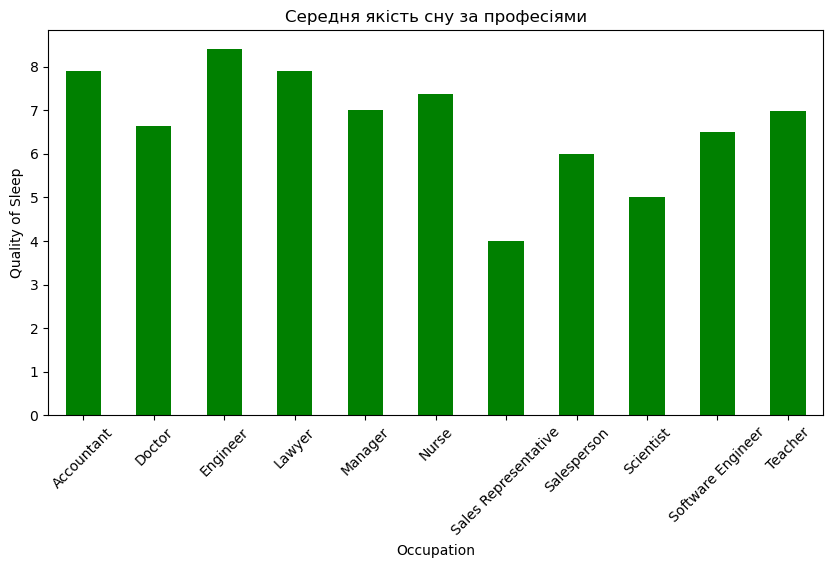

In [28]:
#Графік 1. Середня якість сну за професіями.
my_data.groupby('Occupation')['Quality of Sleep'].mean().plot(kind='bar', color = 'green', figsize=(10,5))
plt.title('Середня якість сну за професіями')
plt.ylabel('Quality of Sleep')
plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.show()

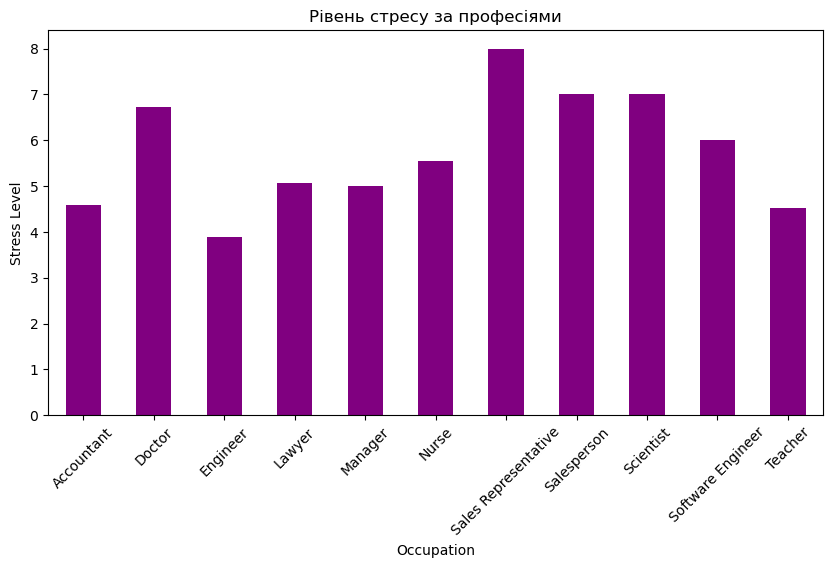

In [29]:
#Графік 2. Рівень стресу за професіями.
my_data.groupby('Occupation')['Stress Level'].mean().plot(kind='bar', color = 'purple',  figsize=(10,5))
plt.title('Рівень стресу за професіями')
plt.ylabel('Stress Level')
plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.show()

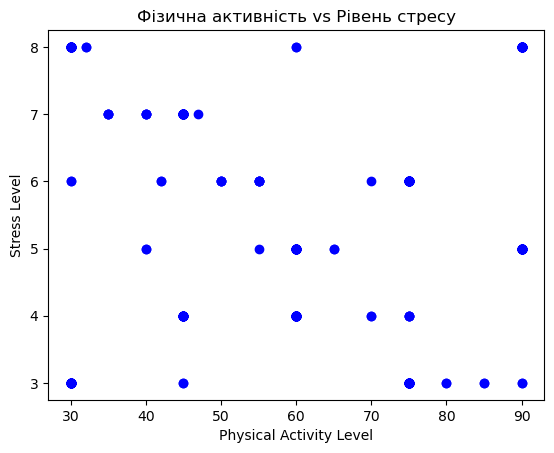

In [37]:
#Графік 3. Фізична активність vs Рівень стресу
plt.scatter(my_data['Physical Activity Level'], my_data['Stress Level'], color = 'blue')
plt.title('Фізична активність vs Рівень стресу')
plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')
plt.show()

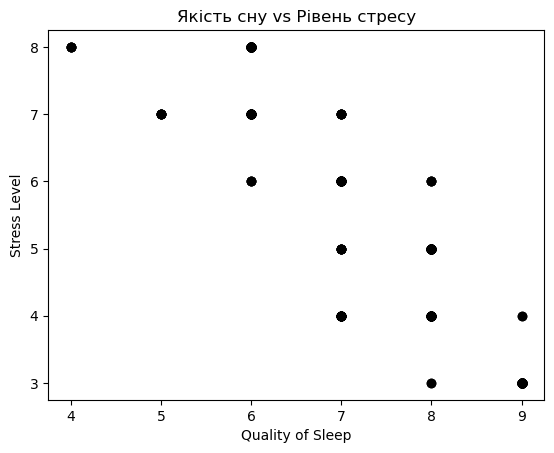

In [36]:
#Графік 4. Якість сну vs Рівень стресу
plt.scatter(my_data['Quality of Sleep'], my_data['Stress Level'], color = 'black')
plt.title('Якість сну vs Рівень стресу')
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')
plt.show()

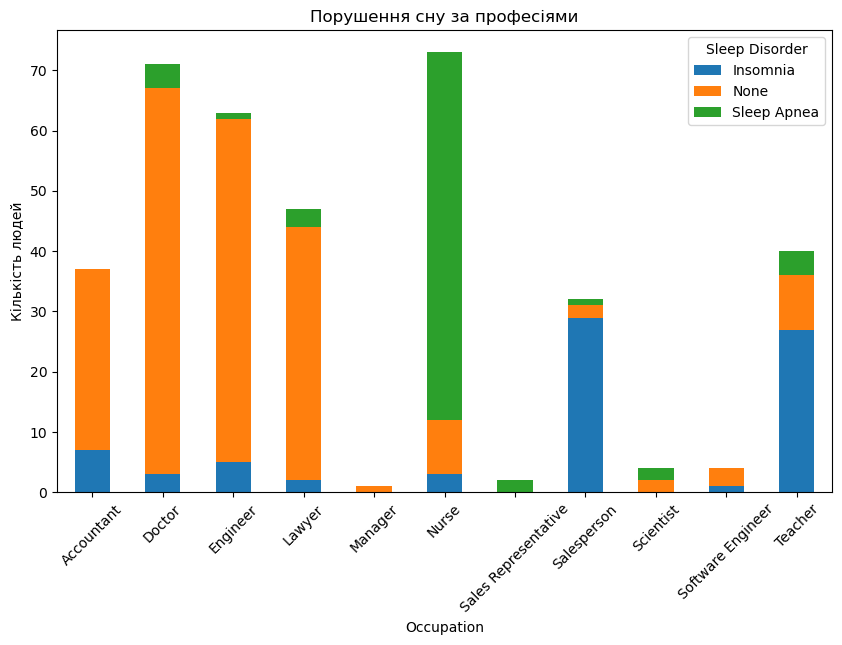

In [32]:
#Графік 5. Порушення сну за професіями.
sleep_disorder_counts = my_data.groupby('Occupation')['Sleep Disorder'].value_counts().unstack()

sleep_disorder_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Порушення сну за професіями')
plt.xlabel('Occupation')
plt.ylabel('Кількість людей')
plt.xticks(rotation=45)
plt.show()